In [1]:
# install required libraries
!pip install seaborn 
!pip install matplotlib
!pip install pandas
!pip install numpy 

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #type: ignore
import random

In [3]:
#  load the dataset
df = pd.read_csv("twitter_dataset.csv")

In [4]:
# display the first 5 rows of the dataset
df.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21


In [5]:
#  Display basic dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   10000 non-null  int64 
 1   Username   10000 non-null  object
 2   Text       10000 non-null  object
 3   Retweets   10000 non-null  int64 
 4   Likes      10000 non-null  int64 
 5   Timestamp  10000 non-null  object
dtypes: int64(3), object(3)
memory usage: 468.9+ KB


In [6]:
# Display the number of missing values in each column
df.isnull().sum()

Tweet_ID     0
Username     0
Text         0
Retweets     0
Likes        0
Timestamp    0
dtype: int64

In [7]:
# Convert 'Timestamp' to datetime format
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [8]:
# printing rhe number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [9]:
# Summary statistics of numerical columns
df.describe()

,Tweet_ID,Retweets,Likes,Timestamp
count,10000.00000,10000.000000,10000.000000,10000
mean,5000.50000,49.721200,49.929300,2023-03-08 19:55:00.845099776
min,1.00000,0.000000,0.000000,2023-01-01 00:01:15
25%,2500.75000,25.000000,25.000000,2023-02-02 18:35:42.500000
50%,5000.50000,49.000000,50.000000,2023-03-08 17:56:55.500000
75%,7500.25000,75.000000,75.000000,2023-04-11 09:22:33.750000128
max,10000.00000,100.000000,100.000000,2023-05-15 12:32:09
std,2886.89568,28.948856,28.877193,NaN


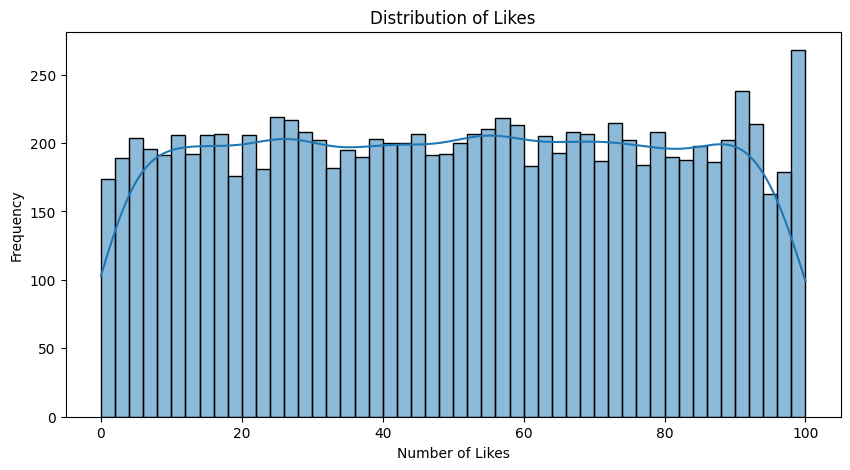

In [10]:
#Distribution of Likes
plt.figure(figsize=(10, 5))
sns.histplot(df["Likes"], bins=50, kde=True)
plt.title("Distribution of Likes")
plt.xlabel("Number of Likes")
plt.ylabel("Frequency")
plt.show()

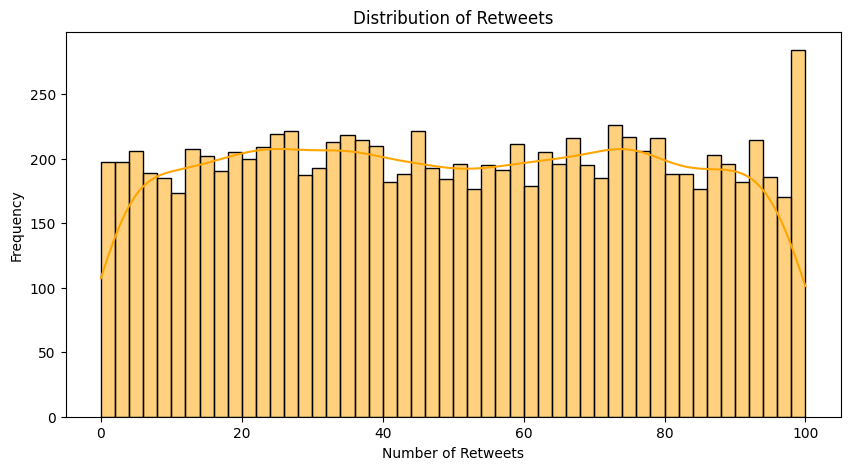

In [11]:
#Distribution of Retweets
plt.figure(figsize=(10, 5))
sns.histplot(df["Retweets"], bins=50, kde=True, color="orange")
plt.title("Distribution of Retweets")
plt.xlabel("Number of Retweets")
plt.ylabel("Frequency")
plt.show()

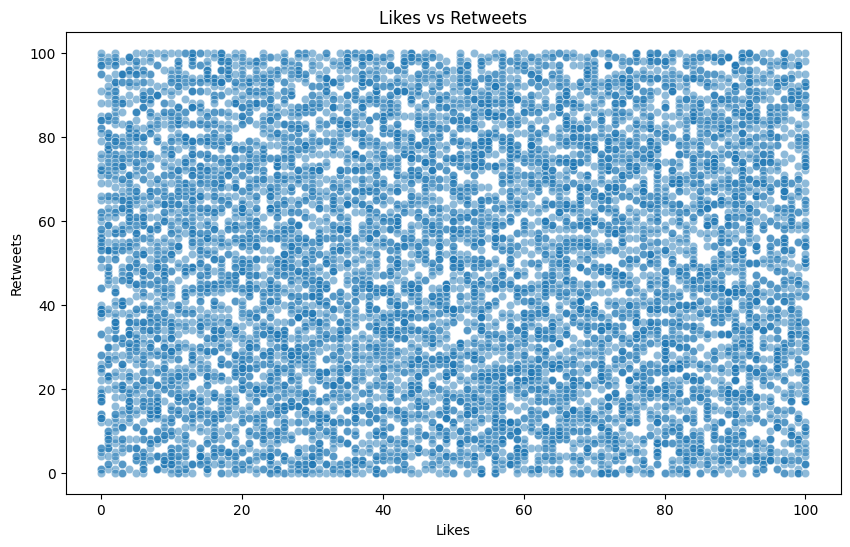

In [12]:
#Likes vs Retweets Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Likes"], y=df["Retweets"], alpha=0.5)
plt.title("Likes vs Retweets")
plt.xlabel("Likes")
plt.ylabel("Retweets")
plt.show()

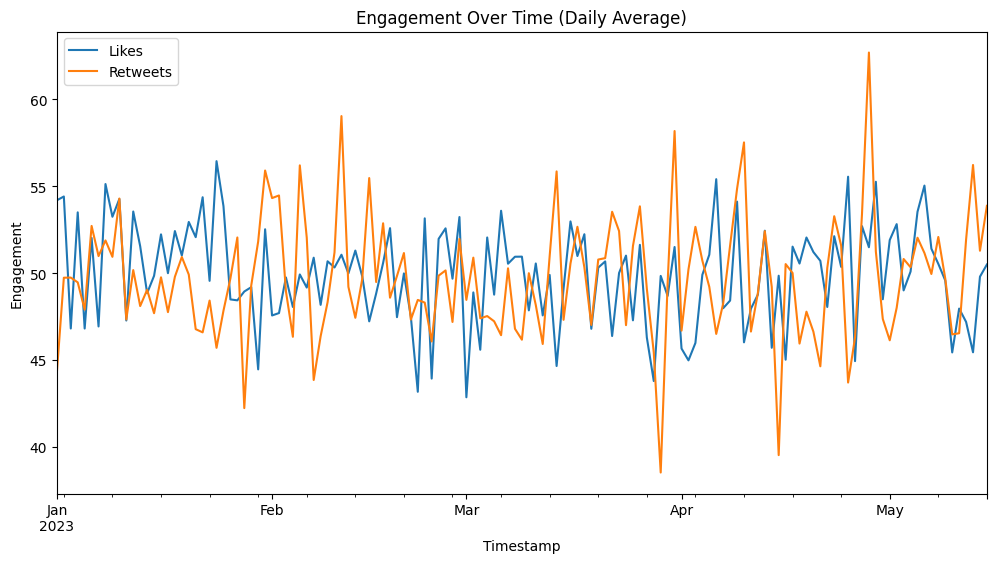

In [13]:
#Engagement Over Time (Daily Average)
df.set_index("Timestamp", inplace=True)

plt.figure(figsize=(12, 6))
df["Likes"].resample("D").mean().plot(label="Likes", legend=True)
df["Retweets"].resample("D").mean().plot(label="Retweets", legend=True)
plt.title("Engagement Over Time (Daily Average)")
plt.ylabel("Engagement")
plt.show()

C:\Users\suraj\AppData\Local\Temp\ipykernel_19468\3163481875.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.index, y=top_users.values, palette="viridis")


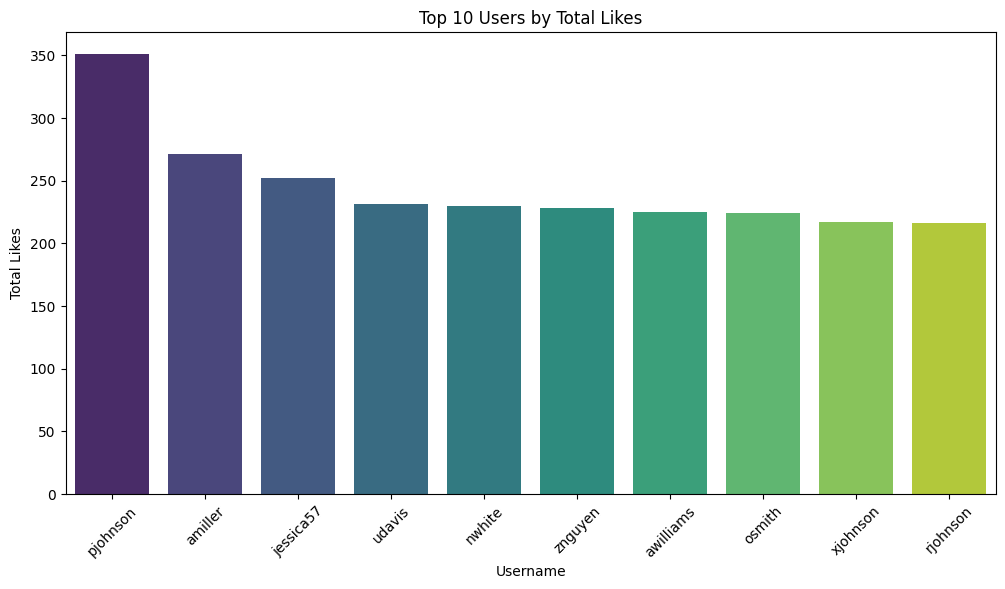

In [14]:
#Top 10 Users by Total Likes
top_users = df.groupby("Username")["Likes"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_users.index, y=top_users.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Users by Total Likes")
plt.xlabel("Username")
plt.ylabel("Total Likes")
plt.show()


C:\Users\suraj\AppData\Local\Temp\ipykernel_19468\497075533.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_retweets.index, y=top_retweets.values, palette="magma")


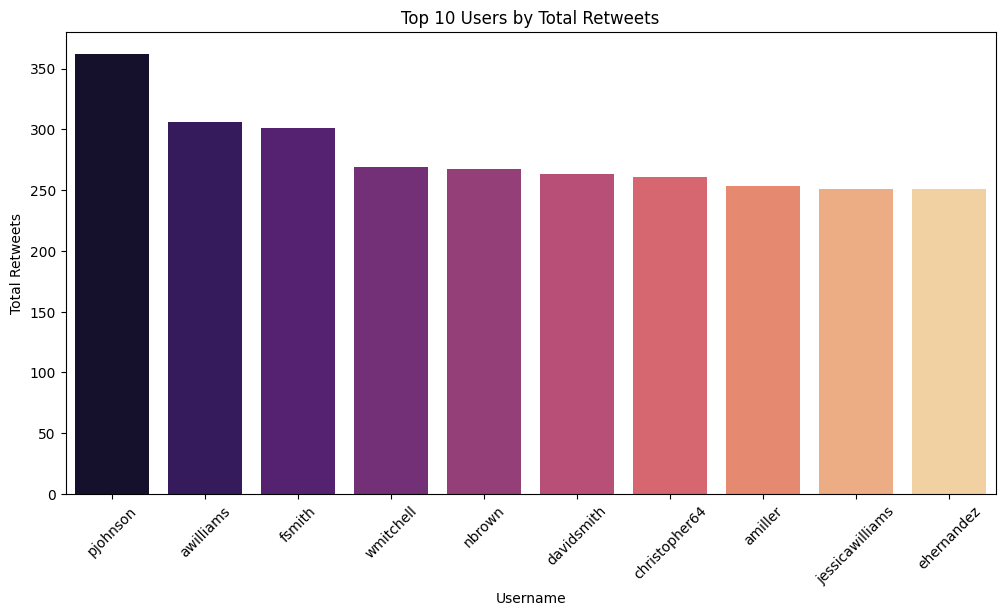

In [15]:
#Top 10 Users by Total Retweets
top_retweets = df.groupby("Username")["Retweets"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_retweets.index, y=top_retweets.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Top 10 Users by Total Retweets")
plt.xlabel("Username")
plt.ylabel("Total Retweets")
plt.show()


In [16]:
# Conclusion
print("\n### Key Insights from EDA ###")
print("The distribution of likes and retweets is right-skewed, meaning some tweets receive much higher engagement than others.")
print("There is a positive correlation between likes and retweets; tweets with high retweets also tend to have high likes.")
print("Engagement fluctuates daily, with certain days showing significantly higher activity.")
print("The most popular users (by total likes and retweets) contribute a large share of engagement.")



### Key Insights from EDA ###
The distribution of likes and retweets is right-skewed, meaning some tweets receive much higher engagement than others.
There is a positive correlation between likes and retweets; tweets with high retweets also tend to have high likes.
Engagement fluctuates daily, with certain days showing significantly higher activity.
The most popular users (by total likes and retweets) contribute a large share of engagement.


In [17]:
from textblob import TextBlob

In [18]:
# Function to get the sentiment of a text
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity of the text
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'


In [19]:
# Apply the function to the 'Text' column
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [20]:
df.head()

,Tweet_ID,Username,Text,Retweets,Likes,Sentiment
Timestamp,,,,,,
2023-01-30 11:00:51,1,julie81,Party least receive say or single. Prevent pre...,2,25,Positive
2023-01-02 22:45:58,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,Positive
2023-01-18 11:25:19,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,Positive
2023-04-10 22:06:29,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,Positive
2023-01-24 07:12:21,5,carlwarren,Involve sense former often approach government...,27,80,Positive


In [21]:
# Display the first few rows with the new 'Sentiment' column
print(df[['Text', 'Sentiment']].head())

                                                                  Text  \
Timestamp                                                                
2023-01-30 11:00:51  Party least receive say or single. Prevent pre...   
2023-01-02 22:45:58  Hotel still Congress may member staff. Media d...   
2023-01-18 11:25:19  Nice be her debate industry that year. Film wh...   
2023-04-10 22:06:29  Laugh explain situation career occur serious. ...   
2023-01-24 07:12:21  Involve sense former often approach government...   

                    Sentiment  
Timestamp                      
2023-01-30 11:00:51  Positive  
2023-01-02 22:45:58  Positive  
2023-01-18 11:25:19  Positive  
2023-04-10 22:06:29  Positive  
2023-01-24 07:12:21  Positive  


C:\Users\suraj\AppData\Local\Temp\ipykernel_19468\2835365789.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


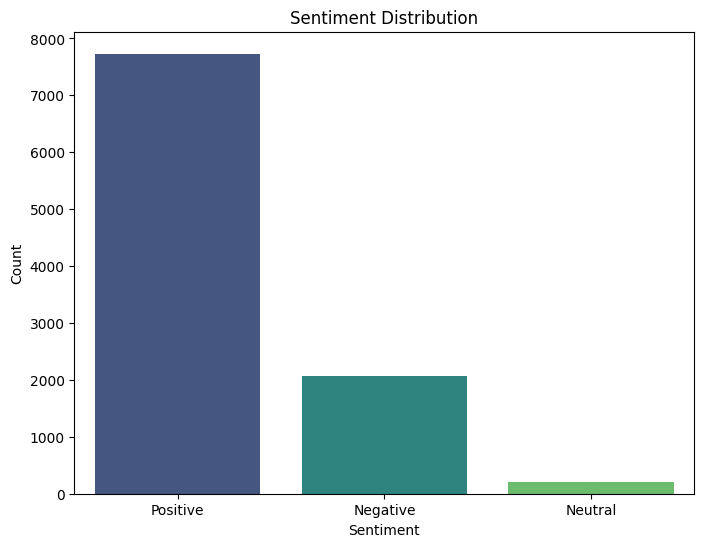

In [22]:
# Plot the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()